## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import os
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Dijalankan jika menggunakan google colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## Data Collection

In [ ]:
CLICK_STREAM_PATH = '/click_stream.csv' # sesuaikan dengan lokasi dataset
CUSTOMER_PATH = '/customer.csv' # sesuaikan dengan lokasi dataset
PRODUCT_PATH = 'product.csv' # sesuaikan dengan lokasi dataset
TRANSACTION_PATH = 'transaction.csv' # sesuaikan dengan lokasi dataset

In [ ]:
click_stream = pd.read_csv(CLICK_STREAM_PATH)
customer = pd.read_csv(CUSTOMER_PATH)
product = pd.read_csv(PRODUCT_PATH)
transactions = pd.read_csv(TRANSACTION_PATH)

## Exploratory Data Analysis

### Click_Stream Dataset

In [ ]:
click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype              
---  ------          -----              
 0   session_id      object             
 1   event_name      object             
 2   event_time      datetime64[ns, UTC]
 3   event_id        object             
 4   traffic_source  object             
 5   event_metadata  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 587.5+ MB


In [ ]:
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])

In [ ]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype              
---  ------          -----              
 0   session_id      object             
 1   event_name      object             
 2   event_time      datetime64[ns, UTC]
 3   event_id        object             
 4   traffic_source  object             
 5   event_metadata  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 587.5+ MB


In [ ]:
click_stream['date'] = click_stream['event_time'].dt.strftime('%d-%m-%Y')

In [ ]:
click_stream['month_year'] = click_stream['event_time']. dt.strftime('%m-%Y')

In [ ]:
click_stream['year'] = click_stream['event_time'].dt.year

In [ ]:
# dari data click_stream bisa dikelompokan berdasarkan event_name dan traffic source
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
click_stream['traffic_source'].unique()

array(['MOBILE', 'WEB'], dtype=object)

In [ ]:
event_name = click_stream[['event_name']].value_counts()
event_name = pd.DataFrame(event_name)
#event_name.reset_index(inplace = True)

In [ ]:
event_name

,0
event_name,
CLICK,2498038
HOMEPAGE,2487126
ADD_TO_CART,1937157
SCROLL,1663571
ITEM_DETAIL,1290396
SEARCH,1173266
BOOKING,852582
PROMO_PAGE,604931
ADD_PROMO,326535


In [ ]:
event_name['percentage'] = click_stream[['event_name']].value_counts(normalize=True) * 100

In [ ]:
event_name

,0,percentage
event_name,,
CLICK,2498038,19.464824
HOMEPAGE,2487126,19.379797
ADD_TO_CART,1937157,15.094414
SCROLL,1663571,12.962620
ITEM_DETAIL,1290396,10.054823
SEARCH,1173266,9.142141
BOOKING,852582,6.643357
PROMO_PAGE,604931,4.713649
ADD_PROMO,326535,2.544375


In [ ]:
event_name.rename(columns = {0:'count'}, inplace = True)

In [ ]:
event_name['percentage'] = event_name['percentage'].round(2)

In [ ]:
event_name.head()

,count,percentage
event_name,,
CLICK,2498038,19.46
HOMEPAGE,2487126,19.38
ADD_TO_CART,1937157,15.09
SCROLL,1663571,12.96
ITEM_DETAIL,1290396,10.05


In [ ]:
event_name.reset_index(inplace = True)

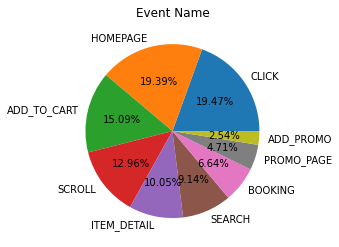

In [ ]:
plt.pie(x = event_name['percentage'], labels = event_name['event_name'],
        autopct = '%.2f%%')
plt.title('Event Name')
plt.show()

In [ ]:
device_used = click_stream[['traffic_source']].value_counts()

In [ ]:
device_used = pd.DataFrame(device_used)

In [ ]:
device_used['percentage'] = click_stream[['traffic_source']].value_counts(normalize = True) * 100
device_used['percentage'] = device_used['percentage'].round(2)
device_used.rename(columns = {0:'count'}, inplace = True)

In [ ]:
device_used.head()

,count,percentage
traffic_source,,
MOBILE,11548304,89.98
WEB,1285298,10.02


In [ ]:
device_used.reset_index(inplace = True)

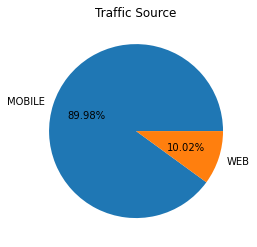

In [ ]:
plt.pie(x = device_used['percentage'], labels = device_used['traffic_source'],
        autopct = '%.2f%%')
plt.title('Traffic Source')
plt.show()

### Customer Dataset

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date;    100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16;
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17;
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25;
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01;
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31;


In [ ]:
customer['first_join_date;'] = pd.to_datetime(customer['first_join_date;'])
customer['birthdate'] = pd.to_datetime(customer['birthdate'])

In [ ]:
# generate umur cust

customer['age'] = (datetime.datetime.now() - customer['birthdate']).astype('<m8[Y]')
customer['age'] = customer['age'].astype(int)
customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29


In [ ]:
# generate umur join date

customer['acc_age'] = (datetime.datetime.now() - customer['first_join_date;']).astype('<m8[Y]')

In [ ]:
customer['acc_age']

0        3.0
1        5.0
2        2.0
3        1.0
4        1.0
        ... 
99995    2.0
99996    4.0
99997    4.0
99998    2.0
99999    1.0
Name: acc_age, Length: 100000, dtype: float64

In [ ]:
customer['acc_age'] = customer['acc_age'].astype(float)
customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;,age,acc_age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,3.0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,5.0


In [ ]:
customer['total_trx'] = customer['customer_id'].map(transactions['customer_id'].value_counts())

In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;,age,acc_age,total_trx
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,3.0,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,5.0,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,2.0,89.0
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,1.0,NaN
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,1.0,1.0


### Product Dataset

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 1 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   id;gender;masterCategory;subCategory;articleType;baseColour;season;year;usage;productDisplayName;;  44446 non-null  object
dtypes: object(1)
memory usage: 347.4+ KB


### Transaction Dataset

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transactions.head(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526


In [ ]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

In [ ]:
transactions['created_at'] = transactions['created_at'].dt.strftime("%d-%m-%Y")

In [ ]:
transactions['shipment_date_limit'] = pd.to_datetime(transactions['shipment_date_limit'])

In [ ]:
transactions['shipment_date_limit'] = transactions['shipment_date_limit'].dt.strftime("%d-%m-%Y")

In [ ]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])
transactions['shipment_date_limit'] = pd.to_datetime(transactions['shipment_date_limit'])

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   created_at              852584 non-null  datetime64[ns]
 1   customer_id             852584 non-null  int64         
 2   booking_id              852584 non-null  object        
 3   session_id              852584 non-null  object        
 4   product_metadata        852584 non-null  object        
 5   payment_method          852584 non-null  object        
 6   payment_status          852584 non-null  object        
 7   promo_amount            852584 non-null  int64         
 8   promo_code              326536 non-null  object        
 9   shipment_fee            852584 non-null  int64         
 10  shipment_date_limit     852584 non-null  datetime64[ns]
 11  shipment_location_lat   852584 non-null  float64       
 12  shipment_location_long  852584

In [ ]:
transactions.head(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-03-08,-8.227893,111.969107,199832
1,2018-07-30,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-03-08,3.013470,107.802514,155526


In [ ]:
import ast

In [ ]:
transactions['product_metadata'] = transactions['product_metadata'].apply(ast.literal_eval)

In [ ]:
transactions = transactions.explode('product_metadata')

transactions = pd.concat([transactions.drop(['product_metadata'], axis=1), transactions['product_metadata'].apply(pd.Series)], axis=1)
transactions

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-03-08,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-03-08,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18,-2.579428,115.743885,550696,53686,4,135174
3,2018-01-11,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-05-11,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27,-6.869535,111.077145,226820,30642,2,113410
852580,2021-09-12,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12,-8.677264,115.176947,359203,19394,1,354213
852581,2021-11-12,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12,-6.185498,106.831093,1158159,13079,4,288835
852582,2019-12-18,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23,-7.155977,110.891858,184143,11312,1,188646


In [ ]:
transactions.isna().any()

created_at                False
customer_id               False
booking_id                False
session_id                False
payment_method            False
payment_status            False
promo_amount              False
promo_code                 True
shipment_fee              False
shipment_date_limit       False
shipment_location_lat     False
shipment_location_long    False
total_amount              False
product_id                False
quantity                  False
item_price                False
dtype: bool

## Data Preparation

### Joining Dataset

In [ ]:
customer_per_trx = pd.merge(transactions, customer, on = 'customer_id', how = 'left').sort_values(by=['created_at'])

In [ ]:
customer_per_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 1254460 to 1162913
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at              1254585 non-null  datetime64[ns]
 1   customer_id             1254585 non-null  int64         
 2   booking_id              1254585 non-null  object        
 3   session_id              1254585 non-null  object        
 4   payment_method          1254585 non-null  object        
 5   payment_status          1254585 non-null  object        
 6   promo_amount            1254585 non-null  int64         
 7   promo_code              481139 non-null   object        
 8   shipment_fee            1254585 non-null  int64         
 9   shipment_date_limit     1254585 non-null  datetime64[ns]
 10  shipment_location_lat   1254585 non-null  float64       
 11  shipment_location_long  1254585 non-null  float64       
 12  total_am

In [ ]:
customer_per_trx

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;,age,acc_age,total_trx
1254460,2016-01-07,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-06-07,...,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,31,6.0,1.0
1201721,2016-01-07,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-03-07,...,62f31284-d7d2-4f77-8e72-eb37fa6c4684,Android 4.0.1,-6.828293,107.895690,Jawa Barat,Indonesia,2016-07-01,27,6.0,5.0
1201589,2016-01-07,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-06-07,...,58d388d2-d1a8-4ccb-be4c-bbe7422664c4,Android 3.2,-0.042226,110.152487,Kalimantan Barat,Indonesia,2016-07-01,27,6.0,88.0
1201590,2016-01-07,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-06-07,...,58d388d2-d1a8-4ccb-be4c-bbe7422664c4,Android 3.2,-0.042226,110.152487,Kalimantan Barat,Indonesia,2016-07-01,27,6.0,88.0
842750,2016-01-08,95704,63125b45-0957-4e33-9410-5028843f78dd,6ccedb26-1624-46b3-9d38-9fbfe23287c6,Gopay,Success,9434,STARTUP,10000,2016-05-08,...,0ccbf39e-1187-4f63-8220-05ef52dc670e,iPhone; CPU iPhone OS 12_4_8 like Mac OS X,-7.801366,110.273867,Yogyakarta,Indonesia,2016-07-31,25,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,2022-12-07,40327,0c680b20-e4b4-414e-956c-b33769f74222,0be49264-dd64-4867-a3c5-42a7df1017b1,Gopay,Success,0,NaN,10000,2022-07-14,...,cab0a927-7d4a-4cb4-b5b7-4e2926a4e8f5,Android 2.3.2,-6.970022,107.088465,Jawa Barat,Indonesia,2022-01-02,23,0.0,42.0
766520,2022-12-07,75237,be6ec436-ceae-46cc-bfef-89ec104de55a,10159ebb-7fb6-4d1e-b709-d102dc45205a,LinkAja,Success,0,NaN,10000,2022-07-14,...,36a6af9e-d894-40c7-948d-9e73fcde5daa,Android 4.4.2,-4.553662,103.564774,Sumatera Selatan,Indonesia,2022-06-05,24,0.0,52.0
213993,2022-12-07,80366,df265326-13c1-4bd9-9853-85621935e728,a397ba3f-0bf7-4846-b349-309a8e4f935d,OVO,Success,0,NaN,0,2022-07-17,...,b6730fa4-d3d2-4957-b518-73319586e929,Android 2.3.2,-0.296689,111.192916,Kalimantan Barat,Indonesia,2021-07-25,15,1.0,15.0
1244809,2022-12-07,76727,d9df6dab-f118-4145-8ca9-7afd853d4b9e,6da77ec5-22c2-449f-8ea6-281f314883d6,Credit Card,Success,0,NaN,0,2022-07-15,...,7ff8ae59-cb2f-4cbd-a133-79eba97a3c40,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.513899,116.126936,Kalimantan Selatan,Indonesia,2022-04-22,43,0.0,10.0


In [ ]:
customer_per_trx.isna().any()

created_at                False
customer_id               False
booking_id                False
session_id                False
payment_method            False
payment_status            False
promo_amount              False
promo_code                 True
shipment_fee              False
shipment_date_limit       False
shipment_location_lat     False
shipment_location_long    False
total_amount              False
product_id                False
quantity                  False
item_price                False
first_name                False
last_name                 False
username                  False
email                     False
gender                    False
birthdate                 False
device_type               False
device_id                 False
device_version            False
home_location_lat         False
home_location_long        False
home_location             False
home_country              False
first_join_date;          False
age                       False
acc_age 

In [ ]:
customer_per_trx.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
first_name                     0
last_name                      0
username                       0
email                          0
gender                         0
birthdate                      0
device_type                    0
device_id                      0
device_version                 0
home_location_lat              0
home_location_long             0
home_location                  0
home_country                   0
first_join_date;               0
age       

## Feature Engineering with RFM

RFM merupakan singkatan dari Recency, Frequency, dan Monetary Value. RFM seringkali digunakan sebagai metrik/ indikator dari perilaku customer. 


1.   Recency: waktu sejak terakhir customer order produk. (Goal: Nilai Rendah)
2.   Frequency: Jumlah transaksi (atau bisa juga rata-rata) sejak menjadi customer. (Goal: Nilai Tinggi)
3.   Monetary: Total atau Rata-rata nilai transaksi. (Goal: Nilai Tinggi)

RFM dapat menjadi indikator resiko customer akan churn atau tidak. sebagai contoh: 
Customer A memiliki Frequency dan Monetary yang tinggi, namun Recency nya juga tinggi, artinya customer tersebut berpotensi churn karena tidak melakukan transaksi dalam waktu yang lama.

source: https://clevertap.com/blog/rfm-analysis/




In [ ]:
customer_per_trx.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,home_location_lat,home_location_long,age,acc_age,total_trx
count,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06
mean,4.980987e+04,2.046875e+03,9.190860e+03,-5.111930e+00,1.109800e+02,1.181574e+06,2.970114e+04,1.475128e+00,2.499744e+05,-5.102431e+00,1.109382e+02,2.626405e+01,3.239904e+00,6.930533e+01
std,2.900057e+04,3.068618e+03,9.371999e+03,3.080204e+00,6.400801e+00,1.728940e+06,1.705351e+04,1.590220e+00,1.118733e+05,3.094229e+00,6.419496e+00,7.279835e+00,1.669348e+00,7.194283e+01
min,3.000000e+00,0.000000e+00,0.000000e+00,-1.099552e+01,9.503073e+01,1.089800e+04,1.163000e+03,1.000000e+00,5.600000e+03,-1.081203e+01,9.527532e+01,6.000000e+00,0.000000e+00,1.000000e+00
25%,2.447800e+04,0.000000e+00,0.000000e+00,-7.375628e+00,1.068633e+02,2.466450e+05,1.477600e+04,1.000000e+00,1.683730e+05,-7.379467e+00,1.068606e+02,2.100000e+01,2.000000e+00,2.000000e+01
50%,4.957700e+04,0.000000e+00,1.000000e+04,-6.242058e+00,1.101724e+02,4.558770e+05,2.861400e+04,1.000000e+00,2.335400e+05,-6.241962e+00,1.101586e+02,2.600000e+01,3.000000e+00,4.600000e+01
75%,7.494800e+04,3.998000e+03,1.000000e+04,-3.090132e+00,1.132200e+02,1.360496e+06,4.469500e+04,1.000000e+00,3.136470e+05,-3.061557e+00,1.132030e+02,3.100000e+01,5.000000e+00,9.300000e+01
max,9.999900e+04,2.451900e+04,5.000000e+04,5.874791e+00,1.410061e+02,2.350449e+07,6.000000e+04,4.800000e+01,1.200357e+06,5.818355e+00,1.409805e+02,6.800000e+01,6.000000e+00,5.500000e+02


In [ ]:
customer_per_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 1254460 to 1162913
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at              1254585 non-null  datetime64[ns]
 1   customer_id             1254585 non-null  int64         
 2   booking_id              1254585 non-null  object        
 3   session_id              1254585 non-null  object        
 4   payment_method          1254585 non-null  object        
 5   payment_status          1254585 non-null  object        
 6   promo_amount            1254585 non-null  int64         
 7   promo_code              481139 non-null   object        
 8   shipment_fee            1254585 non-null  int64         
 9   shipment_date_limit     1254585 non-null  datetime64[ns]
 10  shipment_location_lat   1254585 non-null  float64       
 11  shipment_location_long  1254585 non-null  float64       
 12  total_am

In [ ]:
customer_per_trx['created_at'] = customer_per_trx['created_at'].fillna(customer_per_trx['first_join_date;'])

In [ ]:
customer_per_trx.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
first_name                     0
last_name                      0
username                       0
email                          0
gender                         0
birthdate                      0
device_type                    0
device_id                      0
device_version                 0
home_location_lat              0
home_location_long             0
home_location                  0
home_country                   0
first_join_date;               0
age       

In [ ]:
# Menambahkan kolom YYYY-MM

customer_per_trx['tahun-bulan'] =  customer_per_trx['created_at'].dt.to_period('M')
customer_per_trx

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date;,age,acc_age,total_trx,tahun-bulan
1254460,2016-01-07,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-06-07,...,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,31,6.0,1.0,2016-01
1201721,2016-01-07,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-03-07,...,Android 4.0.1,-6.828293,107.895690,Jawa Barat,Indonesia,2016-07-01,27,6.0,5.0,2016-01
1201589,2016-01-07,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-06-07,...,Android 3.2,-0.042226,110.152487,Kalimantan Barat,Indonesia,2016-07-01,27,6.0,88.0,2016-01
1201590,2016-01-07,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-06-07,...,Android 3.2,-0.042226,110.152487,Kalimantan Barat,Indonesia,2016-07-01,27,6.0,88.0,2016-01
842750,2016-01-08,95704,63125b45-0957-4e33-9410-5028843f78dd,6ccedb26-1624-46b3-9d38-9fbfe23287c6,Gopay,Success,9434,STARTUP,10000,2016-05-08,...,iPhone; CPU iPhone OS 12_4_8 like Mac OS X,-7.801366,110.273867,Yogyakarta,Indonesia,2016-07-31,25,6.0,1.0,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,2022-12-07,40327,0c680b20-e4b4-414e-956c-b33769f74222,0be49264-dd64-4867-a3c5-42a7df1017b1,Gopay,Success,0,NaN,10000,2022-07-14,...,Android 2.3.2,-6.970022,107.088465,Jawa Barat,Indonesia,2022-01-02,23,0.0,42.0,2022-12
766520,2022-12-07,75237,be6ec436-ceae-46cc-bfef-89ec104de55a,10159ebb-7fb6-4d1e-b709-d102dc45205a,LinkAja,Success,0,NaN,10000,2022-07-14,...,Android 4.4.2,-4.553662,103.564774,Sumatera Selatan,Indonesia,2022-06-05,24,0.0,52.0,2022-12
213993,2022-12-07,80366,df265326-13c1-4bd9-9853-85621935e728,a397ba3f-0bf7-4846-b349-309a8e4f935d,OVO,Success,0,NaN,0,2022-07-17,...,Android 2.3.2,-0.296689,111.192916,Kalimantan Barat,Indonesia,2021-07-25,15,1.0,15.0,2022-12
1244809,2022-12-07,76727,d9df6dab-f118-4145-8ca9-7afd853d4b9e,6da77ec5-22c2-449f-8ea6-281f314883d6,Credit Card,Success,0,NaN,0,2022-07-15,...,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.513899,116.126936,Kalimantan Selatan,Indonesia,2022-04-22,43,0.0,10.0,2022-12


In [ ]:
df_churn = customer_per_trx[['customer_id', 'created_at', 'tahun-bulan', 'total_amount','age', 'acc_age', 'total_trx']].copy()

In [ ]:
df_churned = pd.crosstab(df_churn['customer_id'], df_churn['tahun-bulan'])
df_churned

tahun-bulan,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
customer_id,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,7,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
99995,0,0,0,0,0,0,0,0,0,0,...,2,1,4,3,3,0,0,3,1,1
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_churned['last_3m'] = df_churned['2022-10'].map(str) + df_churned['2022-11'].map(str) + df_churned['2022-12'].map(str)

In [ ]:
df_churned['status'] = np.where(df_churned['last_3m'] == '000', 1, 0)

In [ ]:
df_churned

tahun-bulan,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,last_3m,status
customer_id,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,1,7,0,0,1,0,0,0,000,1
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,000,1
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,000,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,000,1
15,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,000,1
99995,0,0,0,0,0,0,0,0,0,0,...,4,3,3,0,0,3,1,1,311,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000,1


In [ ]:
df_churned['status'].value_counts()

1    38553
0    12152
Name: status, dtype: int64

In [ ]:
df_churned = pd.merge(df_churned, df_churn, on='customer_id', how = 'left').sort_values(by=['created_at'])

In [ ]:
df_churned.isnull().sum()

customer_id     0
2016-01         0
2016-02         0
2016-03         0
2016-04         0
               ..
tahun-bulan     0
total_amount    0
age             0
acc_age         0
total_trx       0
Length: 93, dtype: int64

# Model Building

In [ ]:
X = df_churned.drop(columns=['status', 'last_3m', 'tahun-bulan', 'created_at'], axis = 1)
y = df_churned['status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle= True)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1003668, 89), (250917, 89))

In [ ]:
cols = X_train.columns

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [ ]:
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

## Logistic Regression

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [ ]:
print('accuracy of LogReg :', accuracy*100)
print('precision of LogReg :', precision*100)
print('recall of LogReg :', recall*100)

accuracy of LogReg : 70.48785056413077
precision of LogReg : 68.97836333692999
recall of LogReg : 56.510654136037964


## Hyperparameter Tuning Logistic Regression

In [ ]:
for i in ["auto", "ovr"]:
    for j in["lbfgs", "sag", "liblinear"]:
        lr = LogisticRegression(multi_class=(i), solver=(j))
        lr.fit(X_train, y_train)
        print("multi_class", i)
        print("solver", j)
        lr.score(X_test, y_test)
        print(lr.score(X_test, y_test))
        print()

multi_class auto
solver lbfgs
0.6878409992148798



C:\Users\AI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


multi_class auto
solver sag
0.5716910372752743

multi_class auto
solver liblinear
0.7048785056413077

multi_class ovr
solver lbfgs
0.6878409992148798



C:\Users\AI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


multi_class ovr
solver sag
0.5716910372752743

multi_class ovr
solver liblinear
0.7048785056413077



## Cross Validation Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
clf_lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
scores = cross_val_score(clf_lr, X, y, cv=5)
scores

array([0.7320349 , 0.72334278, 0.72021824, 0.69142386, 0.62280754])

# KNN & Hyperparameter Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,3)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_acc_score = accuracy_score(y_test, knn_pred)
knn_rcc_score = recall_score(y_test, knn_pred)
knn_prc_score = precision_score(y_test, knn_pred)

print("Accuracy of knn :", knn_acc_score*100)
print("Recall of knn :", knn_rcc_score*100)
print("Precision of knn :", knn_prc_score*100)

Accuracy of knn : 71.32278801356624
Recall of knn : 49.23513538661952
Precision of knn : 75.25457958812152


In [ ]:
knn_2 =KNeighborsClassifier(n_neighbors=4)
knn_2.fit(X_train, y_train)
knn_2.score(X_test, y_test)

0.6841385796896982

In [ ]:
knn_3 =KNeighborsClassifier(n_neighbors=2, weights = 'uniform')
knn_3.fit(X_train, y_train)
knn_3.score(X_test, y_test)

0.7132278801356624

In [ ]:
knn_3 =KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'ball_tree', leaf_size = 15)
knn_3.fit(X_train, y_train)
knn_3.score(X_test, y_test)

0.7292730265386562

## Cross Validation KNN

In [ ]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors =2, weights = 'distance', algorithm = 'ball_tree', leaf_size=15)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.53742871, 0.53201258, 0.52972895, 0.52671601, 0.51998071])

Best Model for Churn Prediction = Logistic Regression, hal ini dikarenakan performa model Logistic Regression menghasilkan nilai yang lebih tinggi pada saat Cross Validation dibandingkan dengan performa model KNN.

In [ ]:
df_churned

,customer_id,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2022-11,2022-12,last_3m,status,created_at,tahun-bulan,total_amount,age,acc_age,total_trx
78267,6183,2,0,3,0,0,0,1,1,2,...,0,0,100,0,2016-01-07,2016-01,578826,27,6.0,88.0
926932,73773,1,0,0,0,0,0,0,0,0,...,0,0,000,1,2016-01-07,2016-01,256670,31,6.0,1.0
78266,6183,2,0,3,0,0,0,1,1,2,...,0,0,100,0,2016-01-07,2016-01,578826,27,6.0,88.0
207969,16228,1,0,0,0,0,0,0,0,0,...,0,0,000,1,2016-01-07,2016-01,333792,27,6.0,5.0
1014487,81014,1,0,0,0,0,0,0,0,1,...,0,0,000,1,2016-01-08,2016-01,823980,26,6.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080539,86275,0,0,0,0,0,0,0,0,0,...,0,1,201,0,2022-12-07,2022-12,136368,21,1.0,52.0
72306,5803,0,0,0,0,0,0,0,0,0,...,0,1,001,0,2022-12-07,2022-12,1178480,28,0.0,3.0
28335,2182,0,0,0,0,0,0,0,0,0,...,0,7,007,0,2022-12-07,2022-12,2834264,28,3.0,117.0
1107665,88413,0,0,0,0,0,0,0,0,0,...,0,1,001,0,2022-12-07,2022-12,355238,17,1.0,25.0


In [ ]:
customer_per_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 1254460 to 1162913
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at              1254585 non-null  datetime64[ns]
 1   customer_id             1254585 non-null  int64         
 2   booking_id              1254585 non-null  object        
 3   session_id              1254585 non-null  object        
 4   payment_method          1254585 non-null  object        
 5   payment_status          1254585 non-null  object        
 6   promo_amount            1254585 non-null  int64         
 7   promo_code              481139 non-null   object        
 8   shipment_fee            1254585 non-null  int64         
 9   shipment_date_limit     1254585 non-null  datetime64[ns]
 10  shipment_location_lat   1254585 non-null  float64       
 11  shipment_location_long  1254585 non-null  float64       
 12  total_am

In [ ]:
df_gender = pd.DataFrame(customer_per_trx["gender"])

In [ ]:
df_churned_tambahan = pd.concat([df_churned, df_gender], axis=1)

In [ ]:
df_churned_tambahan

,customer_id,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2022-12,last_3m,status,created_at,tahun-bulan,total_amount,age,acc_age,total_trx,gender
0,3,0,0,0,0,0,0,0,0,0,...,0,000,1,2018-08-25,2018-08,826597,36,4.0,51.0,F
1,3,0,0,0,0,0,0,0,0,0,...,0,000,1,2018-09-22,2018-09,163784,36,4.0,51.0,F
2,3,0,0,0,0,0,0,0,0,0,...,0,000,1,2018-10-20,2018-10,124932,36,4.0,51.0,F
3,3,0,0,0,0,0,0,0,0,0,...,0,000,1,2018-11-17,2018-11,247902,36,4.0,51.0,F
4,3,0,0,0,0,0,0,0,0,0,...,0,000,1,2018-12-15,2018-12,181237,36,4.0,51.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,99998,0,0,0,0,0,0,0,0,0,...,0,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,M
1254581,99998,0,0,0,0,0,0,0,0,0,...,0,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F
1254582,99998,0,0,0,0,0,0,0,0,0,...,0,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F
1254583,99998,0,0,0,0,0,0,0,0,0,...,0,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F


## One Hot Encode Gender

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
gender_encode = OneHotEncoder(sparse=False)
gender_encode = gender_encode.fit_transform(df_churned_tambahan[["gender"]])

In [ ]:
gender_encode

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
df_gender_encode = pd.DataFrame(gender_encode, columns=[["Female", "Male"]])

In [ ]:
df_gender_encode

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1254580,0.0,1.0
1254581,1.0,0.0
1254582,1.0,0.0
1254583,1.0,0.0


In [ ]:
df_gender_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   (Female,)  1254585 non-null  float64
 1   (Male,)    1254585 non-null  float64
dtypes: float64(2)
memory usage: 19.1 MB


In [ ]:
df_churned_tambahan = pd.concat([df_churned_tambahan, df_gender_encode], axis=1)

In [ ]:
df_churned_tambahan

,customer_id,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,status,created_at,tahun-bulan,total_amount,age,acc_age,total_trx,gender,"(Female,)","(Male,)"
0,3,0,0,0,0,0,0,0,0,0,...,1,2018-08-25,2018-08,826597,36,4.0,51.0,F,1.0,0.0
1,3,0,0,0,0,0,0,0,0,0,...,1,2018-09-22,2018-09,163784,36,4.0,51.0,F,1.0,0.0
2,3,0,0,0,0,0,0,0,0,0,...,1,2018-10-20,2018-10,124932,36,4.0,51.0,F,1.0,0.0
3,3,0,0,0,0,0,0,0,0,0,...,1,2018-11-17,2018-11,247902,36,4.0,51.0,F,1.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,1,2018-12-15,2018-12,181237,36,4.0,51.0,F,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,99998,0,0,0,0,0,0,0,0,0,...,1,2022-01-25,2022-01,4222436,8,4.0,8.0,M,0.0,1.0
1254581,99998,0,0,0,0,0,0,0,0,0,...,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F,1.0,0.0
1254582,99998,0,0,0,0,0,0,0,0,0,...,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F,1.0,0.0
1254583,99998,0,0,0,0,0,0,0,0,0,...,1,2022-01-25,2022-01,4222436,8,4.0,8.0,F,1.0,0.0


In [ ]:
df_churned_tambahan = df_churned_tambahan.drop("gender", axis=1)

In [ ]:
df_churned_tambahan

,customer_id,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,last_3m,status,created_at,tahun-bulan,total_amount,age,acc_age,total_trx,"(Female,)","(Male,)"
0,3,0,0,0,0,0,0,0,0,0,...,000,1,2018-08-25,2018-08,826597,36,4.0,51.0,1.0,0.0
1,3,0,0,0,0,0,0,0,0,0,...,000,1,2018-09-22,2018-09,163784,36,4.0,51.0,1.0,0.0
2,3,0,0,0,0,0,0,0,0,0,...,000,1,2018-10-20,2018-10,124932,36,4.0,51.0,1.0,0.0
3,3,0,0,0,0,0,0,0,0,0,...,000,1,2018-11-17,2018-11,247902,36,4.0,51.0,1.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,000,1,2018-12-15,2018-12,181237,36,4.0,51.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,99998,0,0,0,0,0,0,0,0,0,...,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,0.0,1.0
1254581,99998,0,0,0,0,0,0,0,0,0,...,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,1.0,0.0
1254582,99998,0,0,0,0,0,0,0,0,0,...,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,1.0,0.0
1254583,99998,0,0,0,0,0,0,0,0,0,...,000,1,2022-01-25,2022-01,4222436,8,4.0,8.0,1.0,0.0


In [ ]:
X = df_churned_tambahan.drop(columns=['status', 'last_3m', 'tahun-bulan', 'created_at'], axis = 1)
y = df_churned_tambahan['status']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
logreg_2 = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
logreg_2.fit(X_train_2, y_train_2)

LogisticRegression(solver='liblinear')

In [ ]:
accuracy_2 = accuracy_score(y_test_2, y_pred_test)
precision_2 = precision_score(y_test_2, y_pred_test)
recall_2 = recall_score(y_test_2, y_pred_test)

print("accuracy logistic regression data tambahan :", accuracy_2)
print("recall logistic regression data tambahan :", recall_2)
print("precision logistic regression data tambahan :", precision_2)


accuracy logistic regression data tambahan : 0.521503126531881
recall logistic regression data tambahan : 0.3509182001042986
precision logistic regression data tambahan : 0.4279970469646204


## Informasi Data dan Model

Dari percobaan di atas dapat diketahui bahwa model terbaik untuk prediksi Churn pada data yang digunakan yaitu model Logistic Regression dengan hyperparameter optimal di atas. 
Setelah diketahui model dengan hyperparameter terbaik, dilakukan percobaan dengan menambahkan feature data Gender pada data frame. Setelah penambahan tersebut, di dapatkan performa model yang lebih buruk dibandingkan dengan data frame tanpa feature Gender